# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [4]:
df = pd.read_csv('Cancer_Data.csv')

In [7]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔍 Step 2: Explore the Dataset

In [8]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [9]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064   

In [10]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [11]:
# Drop the 'Unnamed: 32' column and 'id'
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
unnamed_cols = [col for col in df.columns if 'unnamed' in col.lower()]
if unnamed_cols:
    df.drop(unnamed_cols, axis=1, inplace=True)

## 📊 Step 4: Visualize the Data

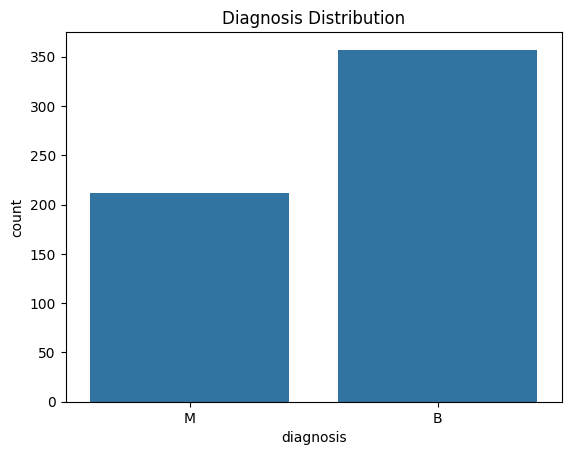

In [12]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()

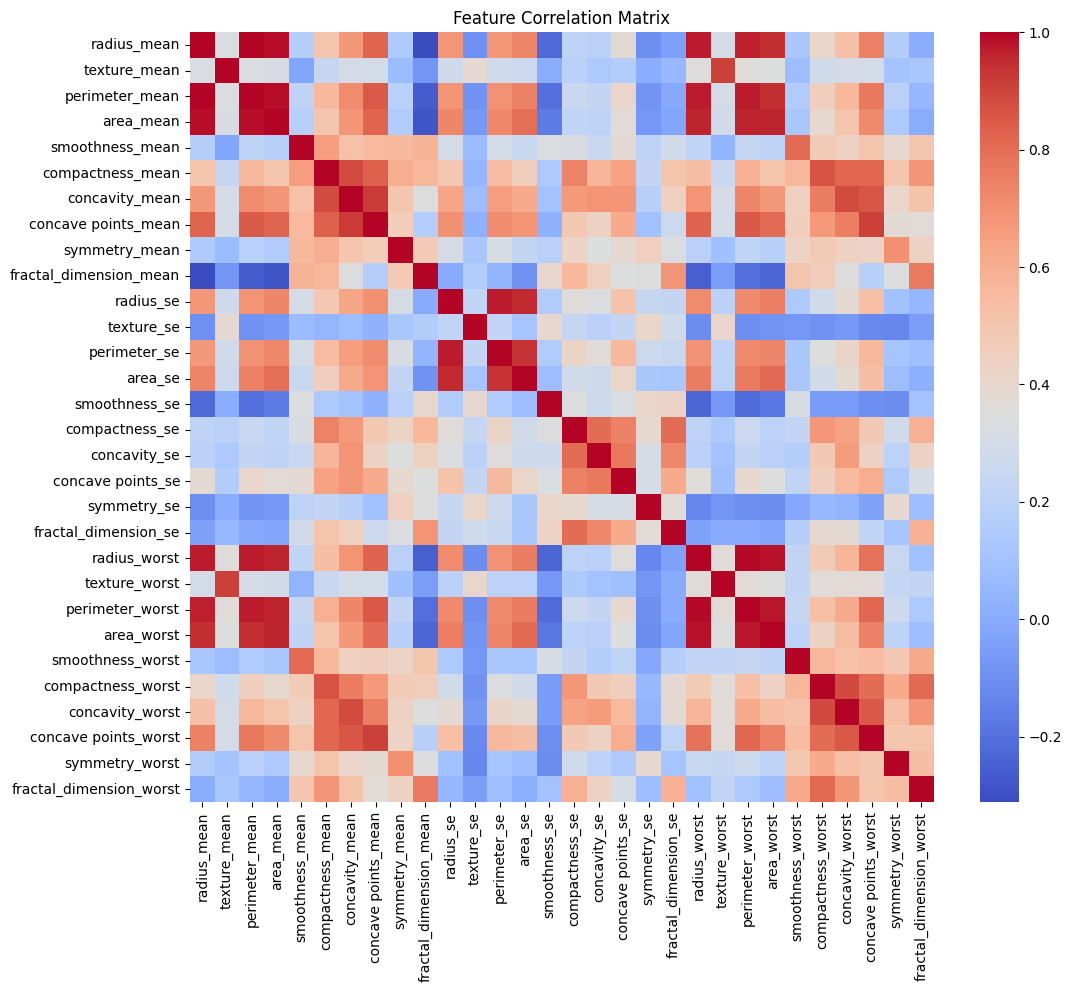

In [14]:
numeric_df = df.drop('diagnosis', axis=1)
plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

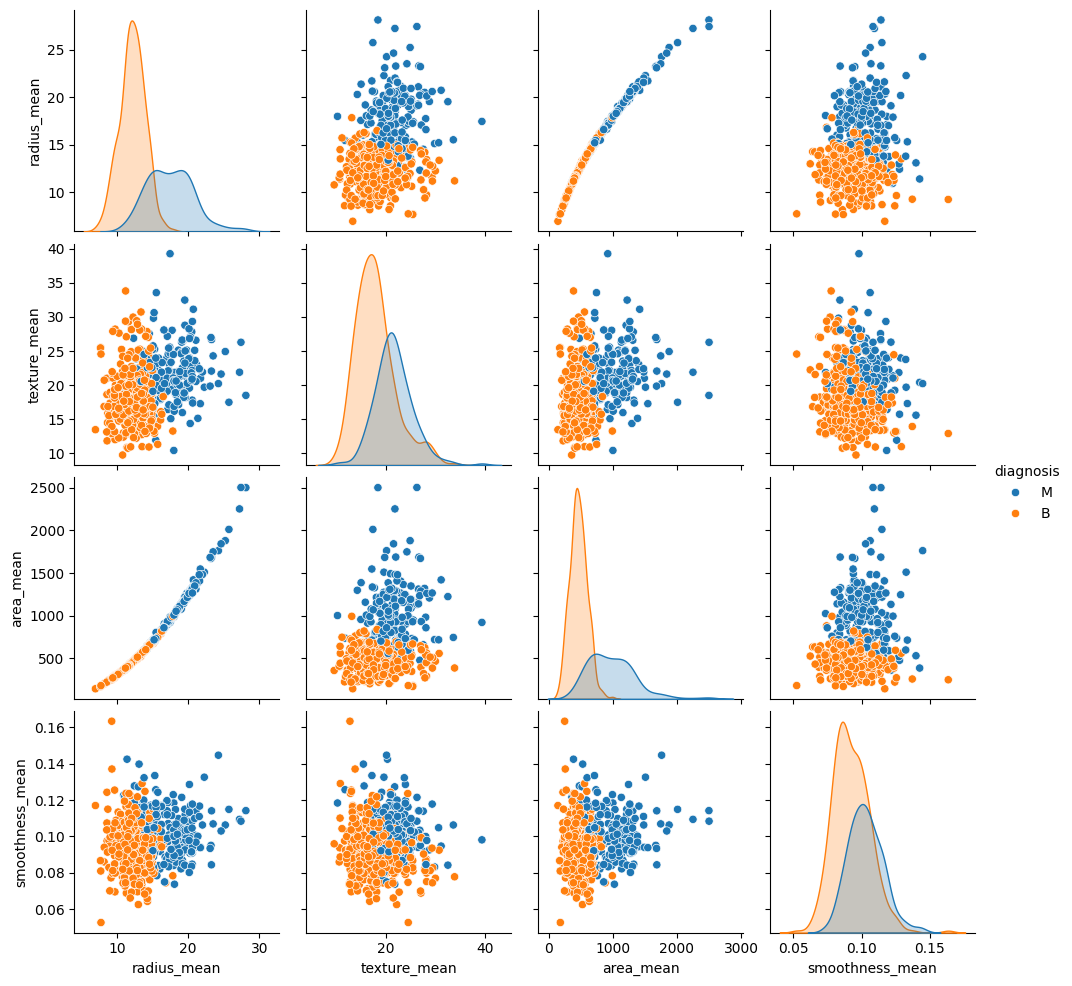

In [15]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'diagnosis']],
             hue='diagnosis', diag_kind='kde')
plt.show()

## ⚙️ Step 5: Preprocess the Data

In [16]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
# Split features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale the features
tscaler = StandardScaler()
X_train_scaled = tscaler.fit_transform(X_train)
X_test_scaled = tscaler.transform(X_test)

## 🤖 Step 6: Train a Machine Learning Model

In [17]:
# Use Logistic Regression
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

## 🧪 Step 7: Evaluate the Model

In [19]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
#Feature Selection (Top 10 features)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)
selected_cols = X.columns[selector.get_support()]
print("Selected Features:", list(selected_cols))

Selected Features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [22]:
#Compare the models like LogisticRegression, RandomForest and Support Vector Machine.
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}
for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.9561
[[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

RandomForest Accuracy: 0.9561
[[72  0]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM Accuracy: 0.9561
[[72  0]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                          

In [23]:
#Hyperparameter Tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train_sel, y_train)
print("Best RF Params:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Tuned RF Accuracy: 0.9473684210526315
[[71  1]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# 🎯 Next Steps Completed! 

1. 🔍 **Feature Selection**  
   - Selected the top 10 most informative features using `SelectKBest`.  

2. 🤖 **Model Comparison**  
   - Evaluated three classifiers:  
     - Logistic Regression  
     - Random Forest  
     - Support Vector Machine  

3. ⚙️ **Hyperparameter Tuning**  
   - Performed a grid search to find the best parameters for the Random Forest model.  